In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/tips (data for regression problem).csv')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [7]:
for column in df.columns:
  print(f"Unique values in column '{column}': {df[column].unique()}")

Unique values in column 'total_bill': [16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 13.81 11.02 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07 26.86 25.28
 14.73 10.51 27.2  22.76 17.29 19.44 16.66 10.07 32.68 15.98 34.83 13.03
 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17 27.28 12.03 12.46
 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21 18.24 14.31 14.    7.25
 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08 11.69 13.42 14.26 15.95
 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27 11.17 12.26 18.26  8.51
 14.15 16.   13.16 17.47 34.3  41.19 27.05 16.43  8.35 18.64 11.87  9.78
  7.51 14.07 13.13 17.26 24.55 19.77 29.85 48.17 25.   13.39 16.49 21.5
 12.66 16.21 17

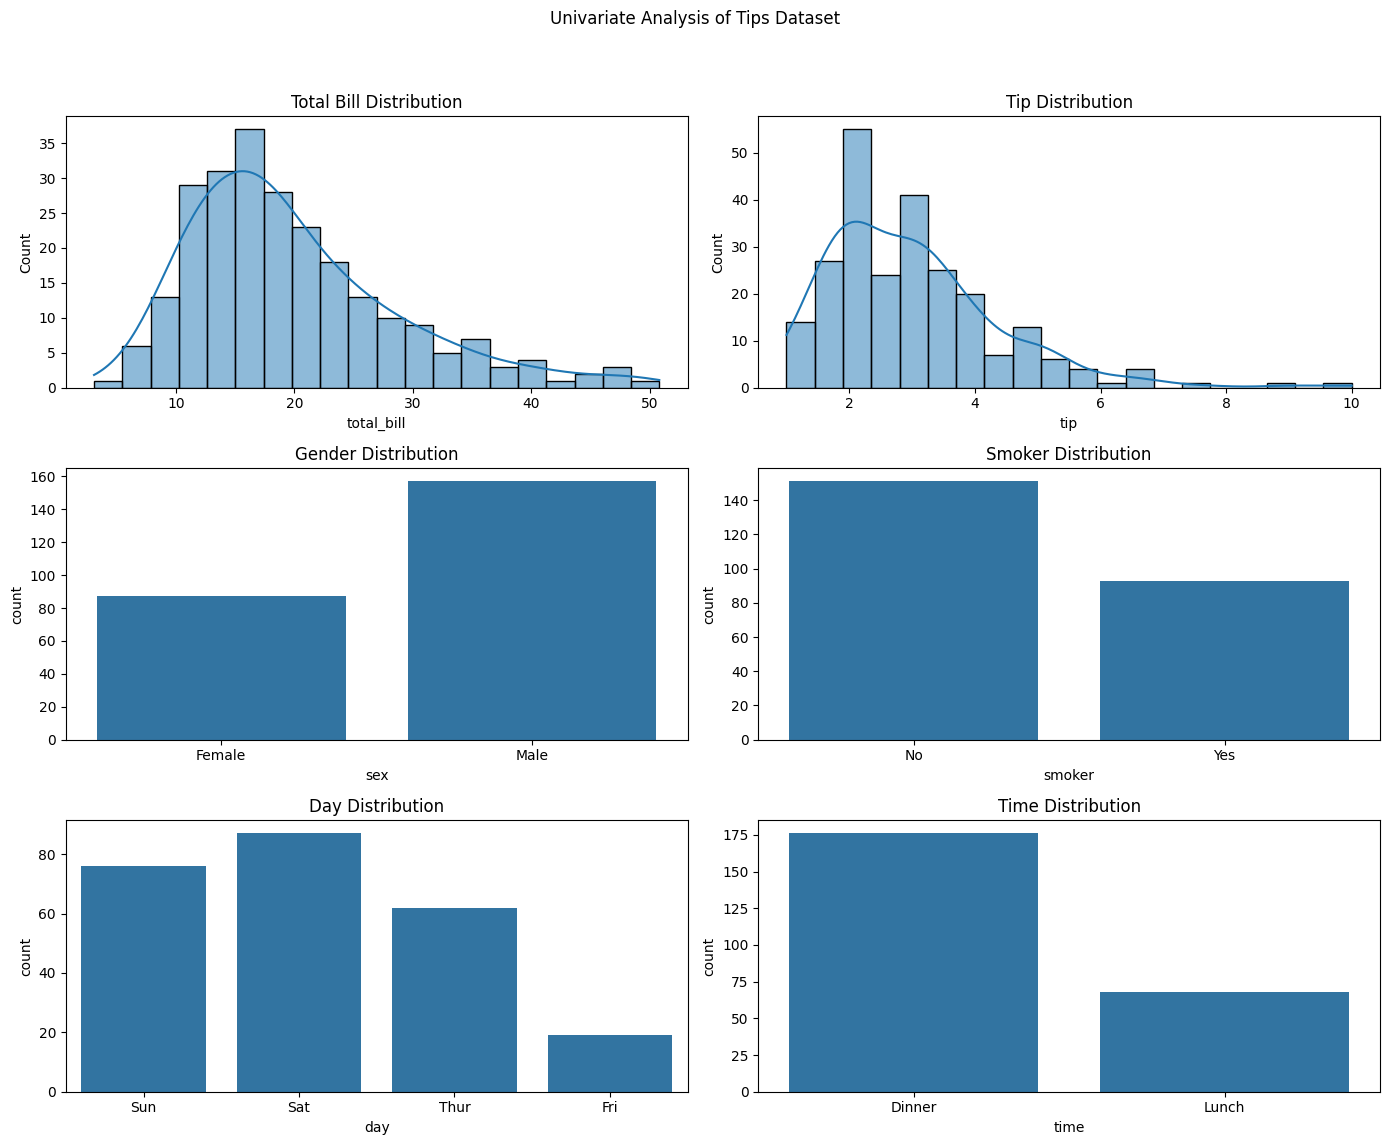

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Univariate Analysis of Tips Dataset')

# Distribution of total bill
sns.histplot(df['total_bill'], bins=20, kde=True, ax=axs[0, 0]).set_title('Total Bill Distribution')

# Distribution of tip
sns.histplot(df['tip'], bins=20, kde=True, ax=axs[0, 1]).set_title('Tip Distribution')

# Gender count
sns.countplot(data=df, x='sex', ax=axs[1, 0]).set_title('Gender Distribution')

# Smoker count
sns.countplot(data=df, x='smoker', ax=axs[1, 1]).set_title('Smoker Distribution')

# Day count
sns.countplot(data=df, x='day', ax=axs[2, 0]).set_title('Day Distribution')

# Time count
sns.countplot(data=df, x='time', ax=axs[2, 1]).set_title('Time Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**The univariate analysis reveals the following insights:**

Total Bill and Tip Distributions: Both total bill and tip amounts vary widely. This suggests a diverse range of spending and tipping behaviors, which could depend on factors like time of day, party size, or customer characteristics.

Gender Distribution: There is a slight imbalance between male and female customers, which might indicate different spending or tipping behaviors based on gender.

Smoker Distribution: A notable portion of customers are smokers. This could help identify areas where smoking-friendly policies might influence customer retention or satisfaction.

Day and Time Distribution: Most entries are from weekends (especially Sunday) and dinner time, indicating peak times for customer visits. Understanding peak days and times helps in staff scheduling and optimizing operational efficiency.

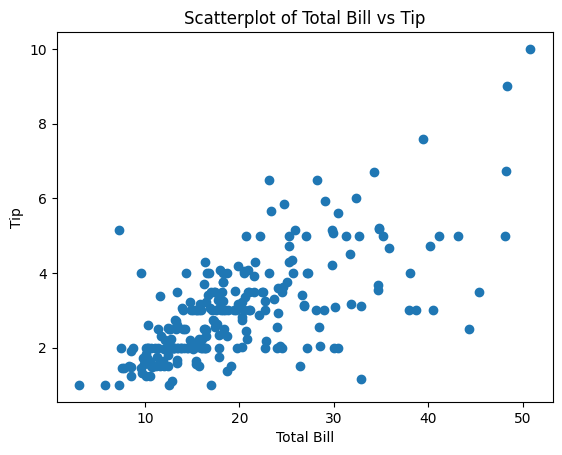

In [9]:
# prompt: scatterplot with bill on x tip on y

import matplotlib.pyplot as plt

plt.scatter(df['total_bill'], df['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatterplot of Total Bill vs Tip')
plt.show()

**SHOWS CERTAIN LEVEL OF LINEARITY IN THE DATA WHICH WE WILL FURTHER TEST USING THE RAINBOW TEST**

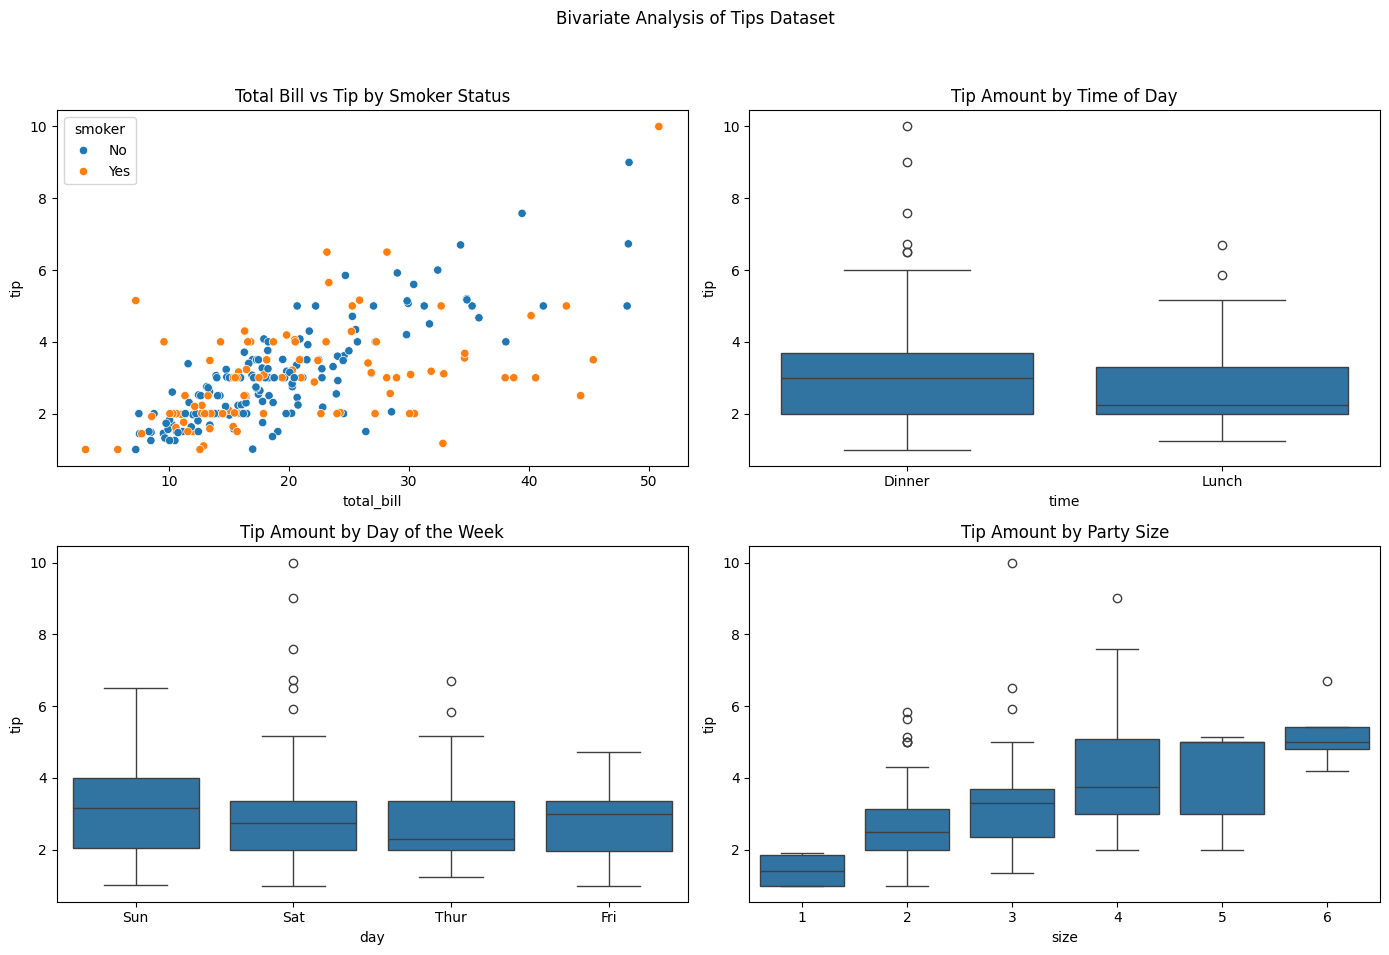

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Bivariate Analysis of Tips Dataset')

# Total bill vs tip, hue by smoker status
sns.scatterplot(data=df, x='total_bill', y='tip', hue='smoker', ax=axs[0, 0]).set_title('Total Bill vs Tip by Smoker Status')

# Tip amount by time of day
sns.boxplot(data=df, x='time', y='tip', ax=axs[0, 1]).set_title('Tip Amount by Time of Day')

# Tip amount by day of the week
sns.boxplot(data=df, x='day', y='tip', ax=axs[1, 0]).set_title('Tip Amount by Day of the Week')

# Tip amount by party size
sns.boxplot(data=df, x='size', y='tip', ax=axs[1, 1]).set_title('Tip Amount by Party Size')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**The bivariate analysis offers several actionable insights:**

Total Bill vs. Tip (by Smoker Status): Smokers and non-smokers have similar spending patterns, but smokers tend to tip slightly less. Management could consider targeted promotions or incentives for smokers to improve tip amounts.

Tip Amount by Time of Day: Tips during dinner are generally higher than during lunch. This could be due to higher total bills or larger party sizes. Management might focus on enhancing the dinner experience, as customers seem more inclined to tip generously.

Tip Amount by Day of the Week: Sundays see slightly higher tips compared to other days, aligning with peak customer visits. Special weekend promotions or enhanced service quality on Sundays could capitalize on this trend.

Tip Amount by Party Size: Larger parties tend to tip more in absolute terms, although tips per individual might be lower. This suggests a potential to encourage group reservations or offer group deals, improving total revenue.

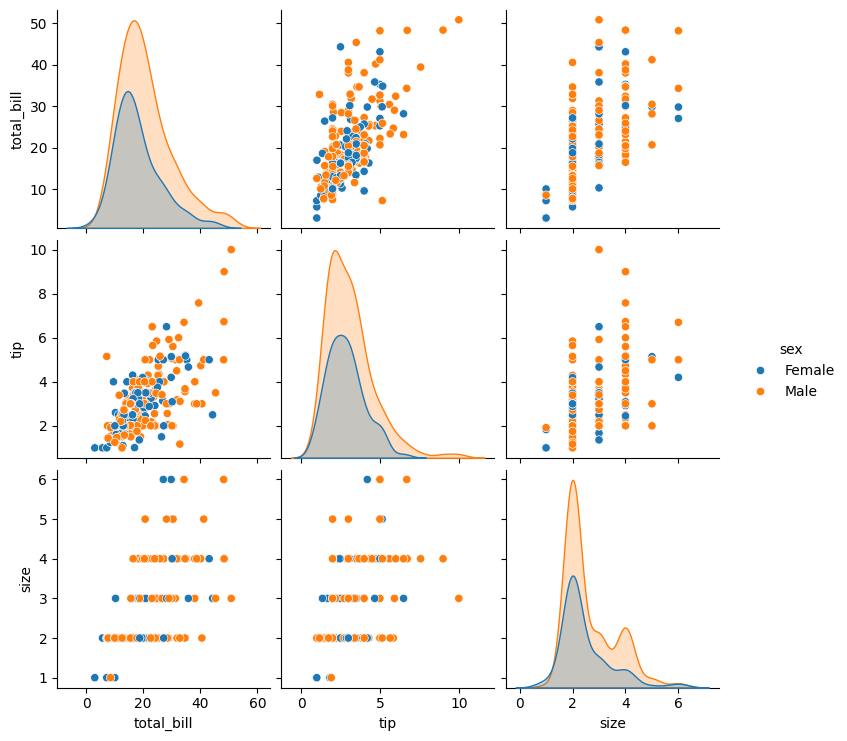

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
sns.pairplot(df, vars=['total_bill', 'tip', 'size'], hue='sex')
plt.show()


**Distribution of total bill:**
Males (orange) tend to have a slightly higher distribution of total bill values compared to females (blue), as seen in the density plot for total bill. This suggests that male customers may spend a bit more on average than female customers.

**Distribution of tip:**
Both males and females show similar distributions in the tip variable, although males have a slightly broader spread. This could indicate that tipping behaviors are relatively similar across genders, but males may sometimes tip a bit more in certain cases.

**Distribution of size:**
Both genders appear to cluster around smaller party sizes, with most groups being small in size. However, males show a slightly wider spread in the size distribution, suggesting that males may come in larger groups more often than females.

**Relationships:**

**Total Bill vs. Tip:** A positive correlation exists between total bill and tip for both males and females, indicating that higher bills generally lead to higher tips across both genders.
**Total Bill vs. Size:** For both genders, larger party sizes correlate with higher total bills, which aligns with the intuitive expectation that larger groups tend to spend more.
**Tip vs. Size:** Similar to the smoker analysis, there’s no strong relationship between tip and size for either gender, meaning that party size does not strongly influence the tip amount beyond the total bill.

**Management Recommendations Based on Gender:**

**Special Offers for Male Customers:**
Since males tend to have slightly higher bills, management could target male customers with loyalty rewards or discounts to encourage repeat visits, potentially increasing average spend per visit.

**Group Incentives for Males:**
Given that males may sometimes come in larger groups, group-based promotions or discounts could attract more large male groups, thus increasing revenue from this segment.

**Tipping Suggestions for All Customers:**
With both genders showing a positive relationship between total bill and tip, management could emphasize suggested tipping amounts on the bill to encourage tipping in proportion to the total amount.

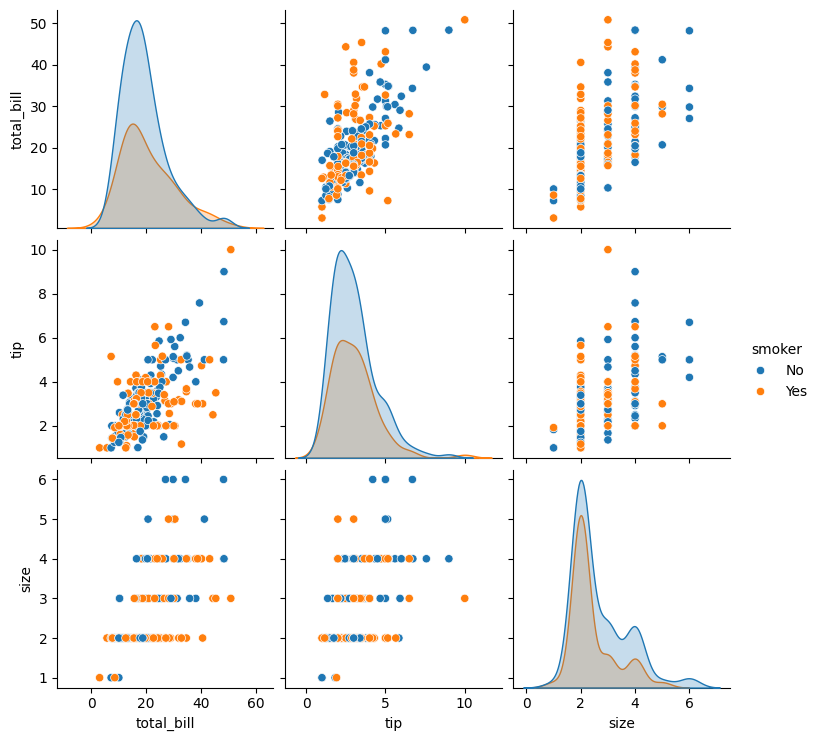

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
sns.pairplot(df, vars=['total_bill', 'tip', 'size'], hue='smoker')
plt.show()


**Total Bill vs. Tip Relationship:**
There is a clear positive relationship between totalbill and tip, indicating that higher bills generally lead to higher tips.
Both smokers and non-smokers follow this trend, although the spread shows some
variability in tipping behavior within both groups.

**Total Bill Distribution by Smoker Status:**
The distribution of totalbill shows that non-smokers (blue) tend to have higher bills on average than smokers (orange). This might suggest that non-smokers spend more per visit.
Smokers are more concentrated in the lower bill range, which could reflect smaller or less expensive orders.

**Tip Distribution by Smoker Status:**
Tips are higher on average for non-smokers compared to smokers, consistent with their higher total bills.
The distribution plot for tips shows less variability in tipping amounts for smokers compared to non-smokers.

**Party Size:**
The size variable shows discrete values, representing typical group sizes.
Most groups consist of two to four people, with fewer large parties (above four).
There is no significant difference between smoker and non-smoker groups in terms of party size.

**Recommendations for Management:**

**Optimize Pricing and Promotions for Smokers and Non-Smokers:**
Since non-smokers tend to have higher bills, consider offering loyalty or rewards programs that encourage repeat visits from this group.
For smokers, targeted promotions or value deals could help increase spending per visit.

**Encourage Tipping:**
Since smokers generally tip less, subtle tipping recommendations (e.g., suggested tipping percentages) could encourage them to tip more generously.
Additionally, enhancing the dining experience for non-smokers can maintain or increase their tipping habits.

**Focus on Group Dynamics:**
Given that most parties are small (two to four people), seating arrangements and table layouts can be optimized for these group sizes.
For larger groups, consider group packages or set menus to enhance their experience and potentially increase the bill size.

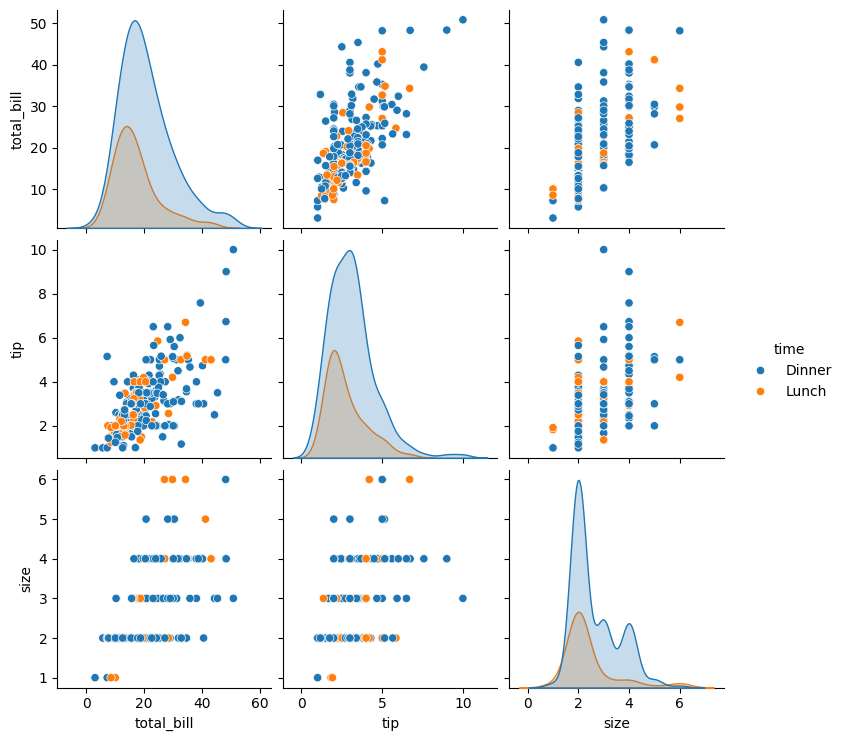

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
sns.pairplot(df, vars=['total_bill', 'tip', 'size'], hue='time')
plt.show()


**Total Bill vs. Tip Relationship:**
There is a clear positive relationship between total bill" and tip indicating that higher bills generally lead to higher tips.
Both lunch and dinner data points follow this trend, though dinner seems to have a broader spread, with higher total bills and tips compared to lunch.

**Total Bill Distribution by Time:**
The distribution of total bill shows that dinner bills (blue) tend to be higher on average than lunch bills (orange). This suggests that customers tend to spend more during dinner service.
Lunch bills are more concentrated in the lower range, likely reflecting smaller or less expensive orders.

**Tip Distribution by Time:**
Tips are higher on average for dinner compared to lunch, which is consistent with higher bills at dinner. This may also indicate a pattern where dinner customers tip more generously.
The distribution plot for tips is more concentrated for lunch, suggesting less variability in tipping at lunchtime.

**Party Size:**
The size variable shows discrete values, which could indicate typical group sizes for tables.
The distribution shows that most tables have two to four people, with fewer large parties (above 4).
Dinner appears to attract larger groups more often than lunch, as evidenced by the greater spread in the blue data points in the size variable.
Insights by Time:
Overall, dinner brings in higher revenue per table due to higher total bills and tips, and often serves larger groups.
Lunch tends to have smaller bills, lower tips, and smaller groups, which could be due to customers preferring quicker, less expensive meals during lunchtime.

**Recommendations for Management:**

**Optimize Pricing and Promotions for Dinner and Lunch:**
Given that dinner has higher bills and attracts larger parties, consider implementing promotions or upselling strategies focused on appetizers, desserts, or group packages to increase the average bill further.
For lunch, lighter or budget-friendly options might appeal to the customer base, aligning with the trend of smaller bills and party sizes.

**Tip-Related Initiatives:**
Since tips are generally higher at dinner, management could focus on enhancing customer experience during dinner service to maintain or improve tipping behavior.
During lunch, where tips and bills are lower, encouraging tipping through suggestions (e.g., adding tipping recommendations on the bill) might help.

**Seating and Staffing:**
With larger groups more common during dinner, management could adjust seating arrangements to accommodate more groups in the evening.
Staffing could also be adjusted to meet the higher demand and potentially longer service times associated with larger dinner parties.

**Targeted Marketing:**
Lunch promotions can be directed at individual customers or small groups, potentially offering quick-service options.
Dinner promotions can target families or groups, emphasizing shared meals and creating a welcoming environment for larger parties.

In [14]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True).astype(float)

In [15]:
df_encoded.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2.0,0.0,0.0,0.0,1.0,0.0,0.0
1,10.34,1.66,3.0,1.0,0.0,0.0,1.0,0.0,0.0
2,21.01,3.50,3.0,1.0,0.0,0.0,1.0,0.0,0.0
3,23.68,3.31,2.0,1.0,0.0,0.0,1.0,0.0,0.0
4,24.59,3.61,4.0,0.0,0.0,0.0,1.0,0.0,0.0


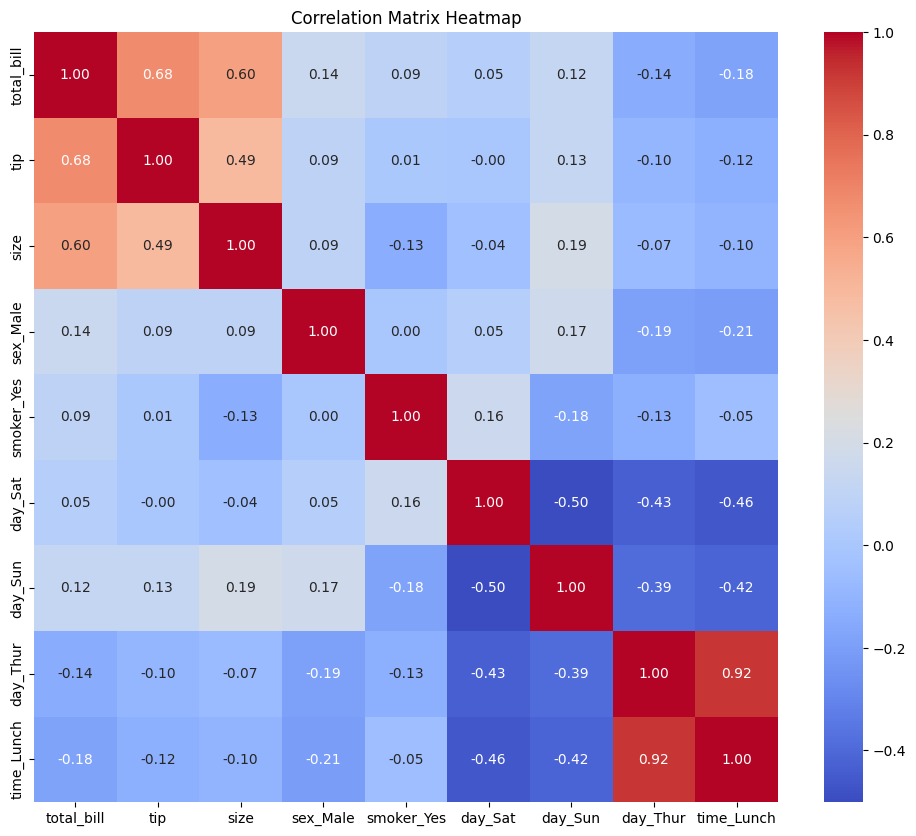

In [16]:
# prompt: correlation matrix and heatmap for all columns

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Total Bill and Tip:** There is a strong positive correlation between the total bill and the tip amount, suggesting that higher bills generally lead to higher tips. This is expected in tipping patterns and could indicate that tipping percentage is relatively consistent across different bill amounts.

**Total Bill and Size:** There is also a strong positive correlation between the total bill and the size of the party. Larger groups typically spend more, which is consistent with the nature of group dining.

**Day and Time Correlations:**
Thurs and Lunch: A very high positive correlation between Thursday and lunch, possibly indicating that Thursday is a popular day for lunch services. Management might leverage this by offering special Thursday lunch promotions to attract more customers.
Negative correlations with Sat and Sun: Strong negative correlations between the weekend days (Saturday and Sunday) and Lunch, which could mean that people tend to visit more during dinner on weekends. Management might consider focusing more on dinner specials during the weekend.

**Smoker Status and Day:**
The correlations between smoker and different days are low, suggesting that the smoker status does not vary significantly by day. However, minor correlations can imply that smoking preferences are somewhat consistent throughout the week.

**Other Gender and Size Correlations:**
Sex and Size: There is a slight negative correlation between party size and Male meaning that groups with males may be slightly smaller on average, but this is a weak correlation.

**Recommendations for Management:**
Optimize Tip Strategies: Since tips are highly correlated with both total bill and party size, management could consider upselling techniques that encourage customers to order more, as higher bills result in higher tips.

**Target Promotions Based on Day and Time Patterns:**
Implement lunch promotions on Thursdays to further capitalize on the high lunch traffic.
For Saturdays and Sundays, where lunch has lower attendance, focus more on dinner promotions or events that encourage customers to dine during these times.
Special Offers for Large Groups: Since larger groups lead to higher bills, management could create group dining packages or discounts to encourage more large parties, which can help boost total revenue and tips.

**Understanding Smoker Preferences:** While the smoker variable doesn't show a strong correlation with specific days, if smoking areas are limited, maintaining flexibility on seating arrangements or developing outdoor areas could improve the experience for smoking customers.

**Gender-Based Insights:** Although the correlation is weak, if male-dominated parties tend to be smaller, they may benefit from smaller table setups or different seating arrangements.

In [17]:
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd

X = df_encoded.drop(columns=['tip'])  # Drop the response variable from predictors
X = sm.add_constant(X)  # Adds an intercept term to the model
y = df['tip']

# X = X.astype(float)
# y = y.astype(float)
# Fit the OLS model
model = sm.OLS(y, X).fit()

# Run the Rainbow test
test_stat, p_value = smd.linear_rainbow(model)
print(f"Rainbow Test Statistic: {test_stat}")
print(f"p-value: {p_value}")


Rainbow Test Statistic: 1.197054547994589
p-value: 0.1658838305924099


In [18]:
# Import the StandardScaler class from scikit-learn
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

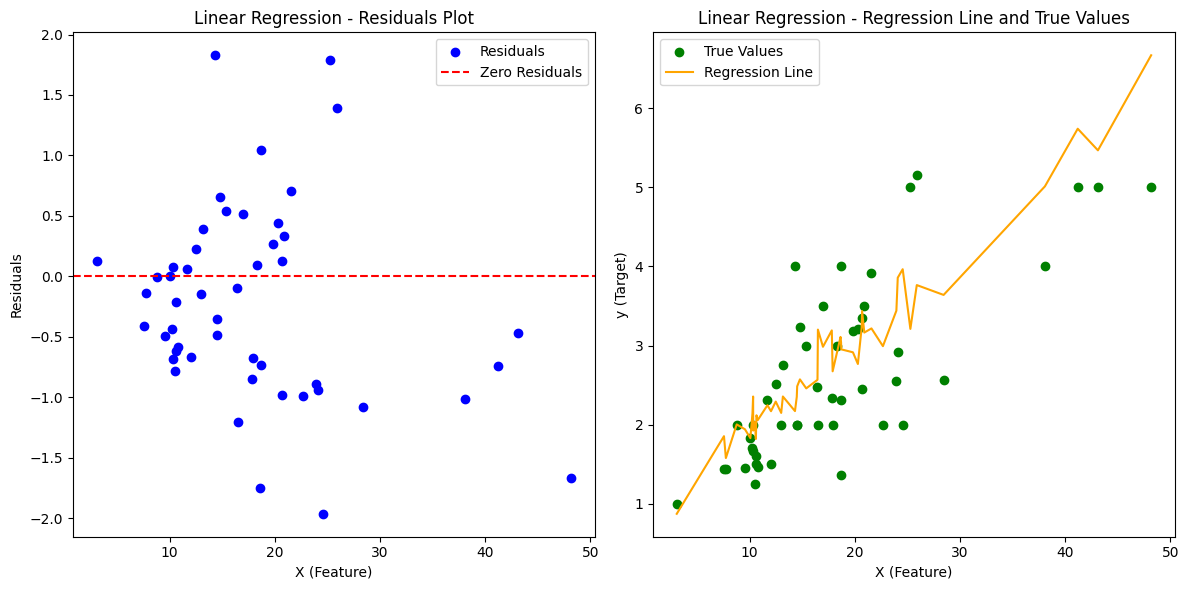

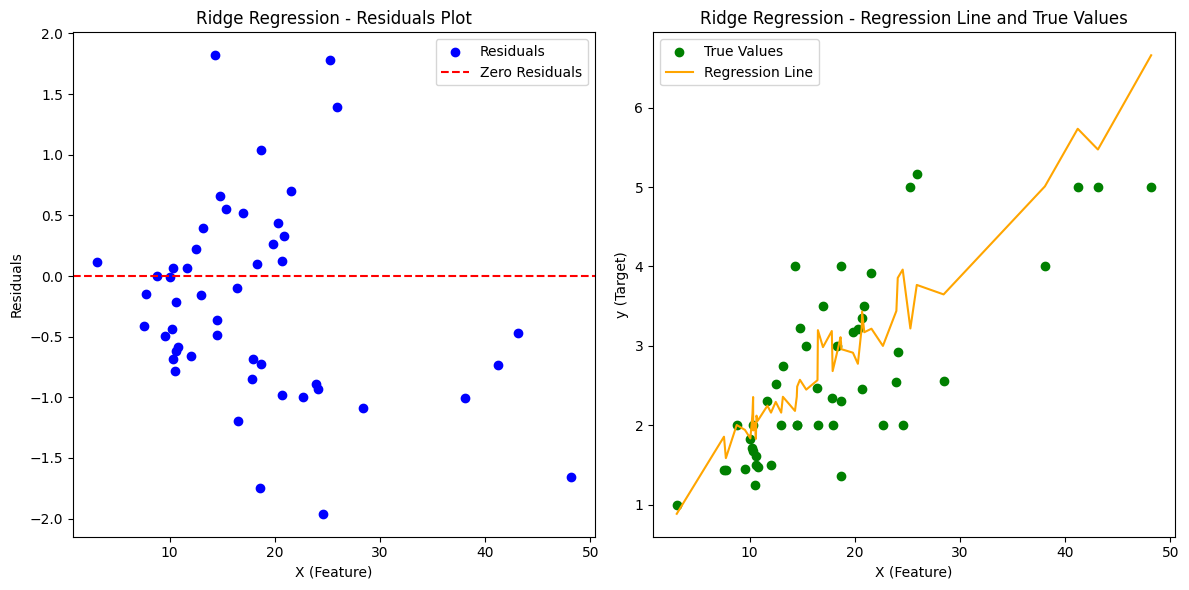

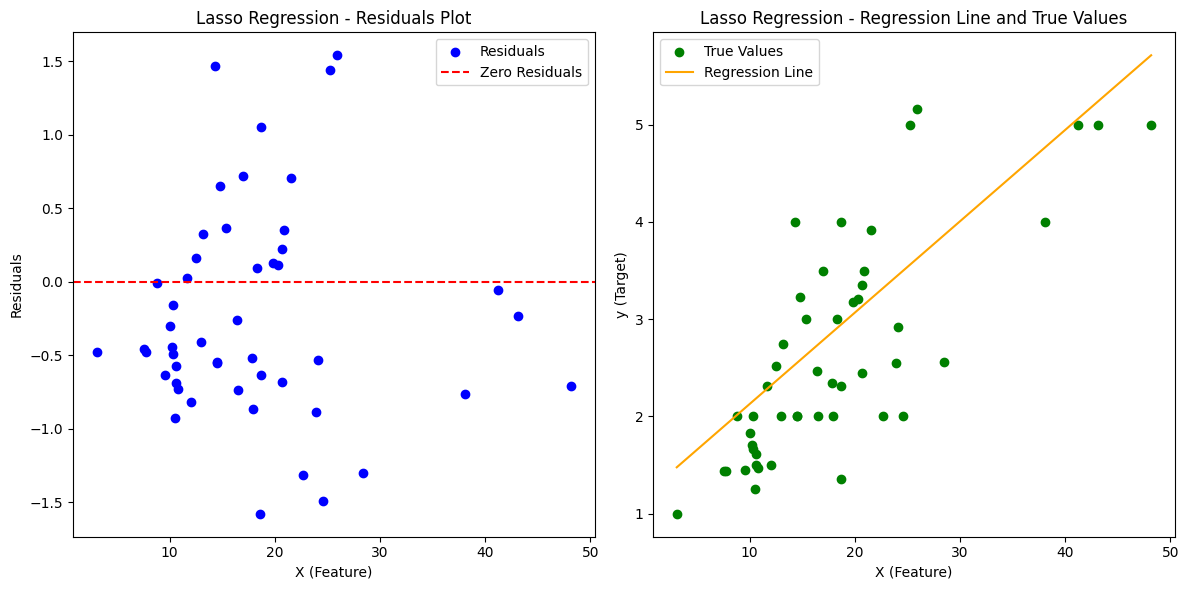

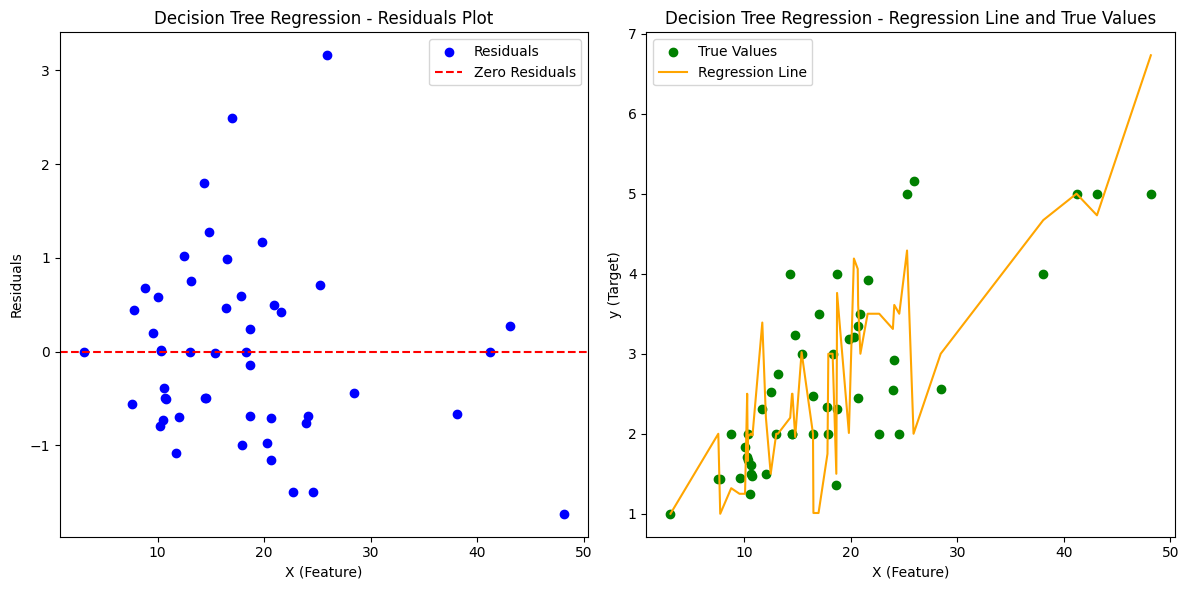

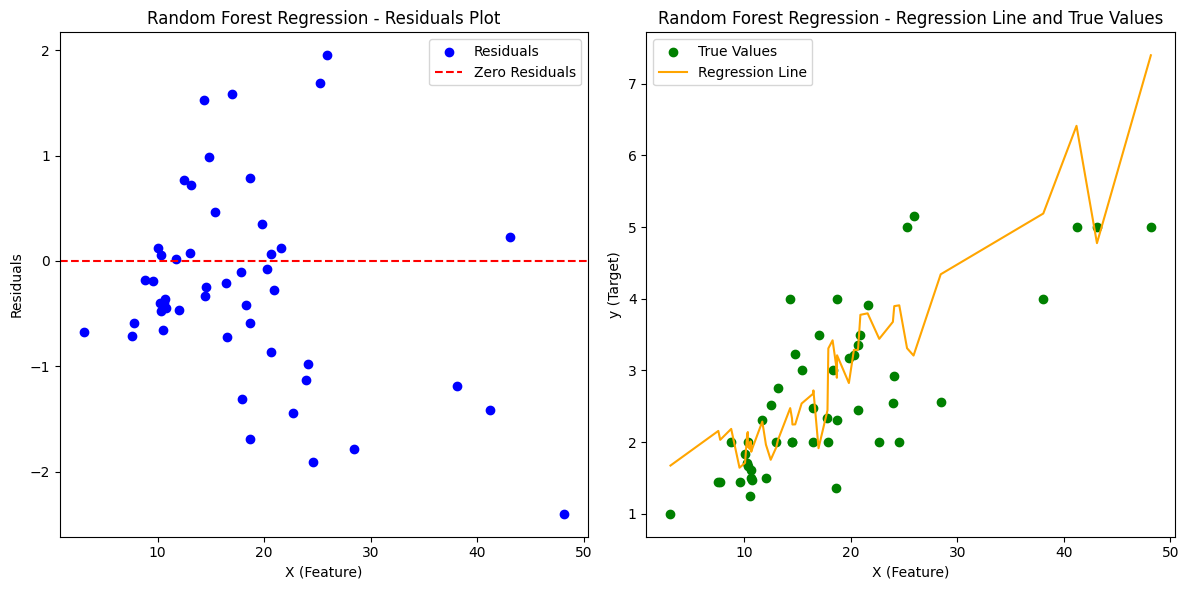

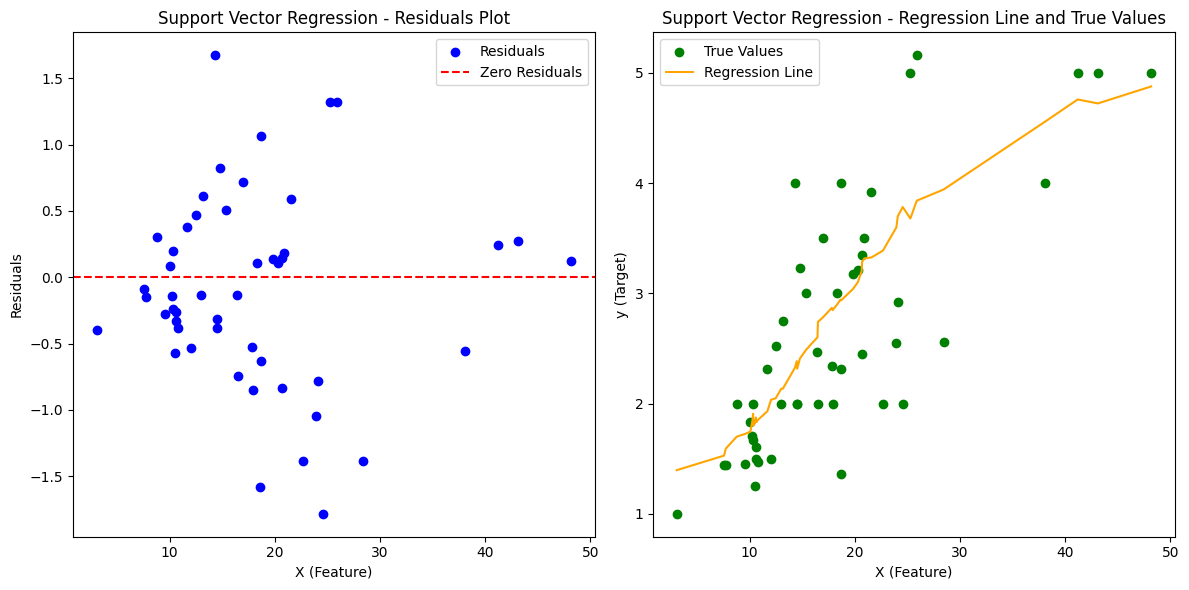

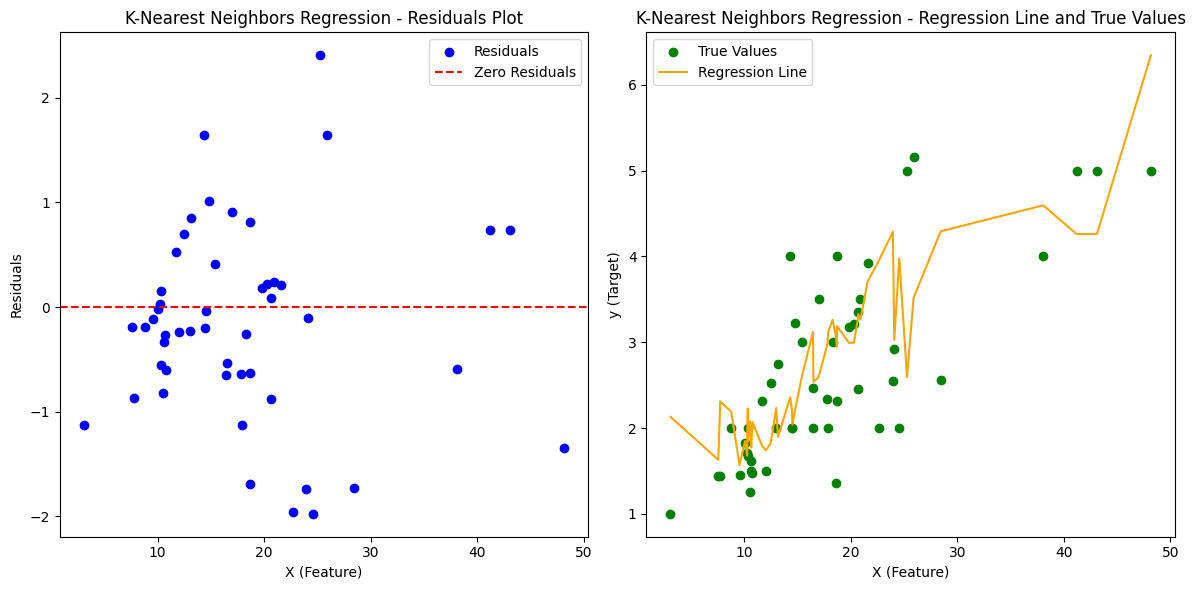

                                     MSE      RMSE       MAE  R2 Score
Linear Regression               0.703357  0.838664  0.667133  0.437302
Ridge Regression                0.700748  0.837107  0.666538  0.439389
Lasso Regression                0.566598  0.752727  0.625610  0.546712
Decision Tree Regression        0.927304  0.962966  0.735306  0.258140
Random Forest Regression        0.908368  0.953083  0.737910  0.273289
Support Vector Regression       0.532376  0.729641  0.567986  0.574089
K-Nearest Neighbors Regression  0.876373  0.936148  0.718857  0.298886


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define features (X) and target (y)
X = df_encoded.drop('tip', axis=1)  # Assuming df_encoded is your encoded data
y = df['tip']  # Assuming 'tip' is your target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor()
}

# Create dictionary to store results
results = {}

# Loop through models, train, and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2 Score': r2}

    # Plotting Residuals and Line Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(12, 6))

    # Residuals Plot
    plt.subplot(1, 2, 1)
    plt.scatter(X_test.iloc[:, 0], residuals, color='blue', label='Residuals')  # X_test is 2D, so use the first column
    plt.axhline(0, color='red', linestyle='--', label='Zero Residuals')
    plt.title(f'{name} - Residuals Plot')
    plt.xlabel('X (Feature)')
    plt.ylabel('Residuals')
    plt.legend()

    # Line Plot of Predictions and Regression Line
    plt.subplot(1, 2, 2)
    # Plotting the true values
    plt.scatter(X_test.iloc[:, 0], y_test, color='green', label='True Values')
    # Sorting the X values for a smooth regression line plot
    sorted_idx = np.argsort(X_test.iloc[:, 0])
    plt.plot(X_test.iloc[:, 0].iloc[sorted_idx], y_pred[sorted_idx], color='orange', label='Regression Line')

    plt.title(f'{name} - Regression Line and True Values')
    plt.xlabel('X (Feature)')
    plt.ylabel('y (Target)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create DataFrame to display results
results_df = pd.DataFrame.from_dict(results, orient='index')

# Display results
print(results_df)


**HERE WE CAN CLEARLY SEE THAT SVR GIVES THE BEST RESULT OUT OF ALL MODELS**

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define features (X) and target (y)
X = df_encoded.drop('tip', axis=1)
y = df['tip']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor()
}

# Dictionary to store results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store metrics and parameters
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2,
        'Parameters': model.get_params()
    }

# Create DataFrame to display results
results_df = pd.DataFrame.from_dict(results, orient='index')

# Display results
results_df


,MSE,RMSE,MAE,R2 Score,Parameters
Linear Regression,0.703357,0.838664,0.667133,0.437302,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
Ridge Regression,0.700748,0.837107,0.666538,0.439389,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'..."
Lasso Regression,0.566598,0.752727,0.625610,0.546712,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'..."
Decision Tree Regression,1.079306,1.038897,0.781224,0.136535,"{'ccp_alpha': 0.0, 'criterion': 'squared_error..."
Random Forest Regression,0.916920,0.957560,0.739008,0.266447,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri..."
Support Vector Regression,0.532376,0.729641,0.567986,0.574089,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd..."
K-Nearest Neighbors Regression,0.876373,0.936148,0.718857,0.298886,"{'algorithm': 'auto', 'leaf_size': 30, 'metric..."


In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

# Define your hyperparameter grids
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False]
    },
    'Ridge Regression': {
        'alpha': np.linspace(0.1, 10, 100)
    },
    'Lasso Regression': {
        'alpha': np.linspace(0.1, 10, 100),
        'max_iter': [500, 1000, 2000]
    },
    'Decision Tree Regression': {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest Regression': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Support Vector Regression': {
        'C': [0.1, 1.0, 10.0],
        'epsilon': [0.01, 0.1, 0.5],
        'kernel': ['linear', 'rbf']
    },
    'K-Nearest Neighbors Regression': {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
}

# Initialize your models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor()
}

# Assuming X_train, X_test, y_train, y_test are already defined
optimized_results = {}

# Loop through models and use GridSearchCV
for name, model in models.items():
    # Create GridSearchCV object for each model
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring='r2',  # Optimize for R2 score
        cv=5,  # 5-fold cross-validation
        n_jobs=-1  # Use all available processors
    )

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get best parameters and best R² score
    best_params = grid_search.best_params_
    best_r2_score = grid_search.best_score_

    # Store best results for each model
    optimized_results[name] = {
        'Best Parameters': best_params,
        'Best R2 Score': best_r2_score
    }

# Display optimized results in a DataFrame
optimized_results_df = pd.DataFrame.from_dict(optimized_results, orient='index')
print(optimized_results_df)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


                                                                  Best Parameters  \
Linear Regression                                         {'fit_intercept': True}   
Ridge Regression                                                  {'alpha': 10.0}   
Lasso Regression                                  {'alpha': 0.6, 'max_iter': 500}   
Decision Tree Regression        {'max_depth': 3, 'min_samples_leaf': 2, 'min_s...   
Random Forest Regression        {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...   
Support Vector Regression          {'C': 0.1, 'epsilon': 0.5, 'kernel': 'linear'}   
K-Nearest Neighbors Regression   {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}   

                                Best R2 Score  
Linear Regression                    0.310516  
Ridge Regression                     0.323038  
Lasso Regression                     0.355618  
Decision Tree Regression             0.331715  
Random Forest Regression             0.398091  
Support Vector Regression      

In [24]:
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Define the models and their parameter grids
models = {
    "ElasticNet Regression": ElasticNet(),
    "Polynomial Regression (with Ridge)": Pipeline([
        ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
        ('regressor', Ridge())  # Can also use Lasso() here
    ])
}

# Parameter grids for moderate tuning
param_grids = {
    "ElasticNet Regression": {
        'alpha': [0.01, 0.1, 1, 10],
        'l1_ratio': [0.2, 0.5, 0.8]
    },
    "Polynomial Regression (with Ridge)": {
        'regressor__alpha': [0.01, 0.1, 1, 10]
    }
}

# Dictionary to store results
results = {}

# Apply tuning for each model
for model_name, model in models.items():
    print(f"Processing {model_name}...")

    # Use GridSearchCV for tuning
    search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='r2')
    search.fit(X_train, y_train)

    # Get the best model and make predictions
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Calculate scores
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Store results
    results[model_name] = {
        "Best Params": search.best_params_,
        "R2 Score": r2,
        "Mean Squared Error": mse
    }
    print(f"{model_name} - R2 Score: {r2:.4f}, MSE: {mse:.4f}")

# Display results for each model
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print("Best Parameters:", metrics["Best Params"])
    print(f"R2 Score: {metrics['R2 Score']:.4f}")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']:.4f}")


Processing ElasticNet Regression...
ElasticNet Regression - R2 Score: 0.5489, MSE: 0.5638
Processing Polynomial Regression (with Ridge)...
Polynomial Regression (with Ridge) - R2 Score: 0.2591, MSE: 0.9261

ElasticNet Regression:
Best Parameters: {'alpha': 1, 'l1_ratio': 0.5}
R2 Score: 0.5489
Mean Squared Error: 0.5638

Polynomial Regression (with Ridge):
Best Parameters: {'regressor__alpha': 10}
R2 Score: 0.2591
Mean Squared Error: 0.9261


**After trying hyperparameter tuning and trying several models, the best obtained result is still the one obtained by SUPPORT VECTOR REGRESSION model on default parameters.**

**R² for SVR: 0.5740891915042663**

**MSE for SVR: 0.5323763062616395**

**RMSE for SVR: 0.7296412174909251**

**MAE for SVR: 0.5679864502285391**

**Best parameters for SVR: {'C': 1.0, 'epsilon': 0.1, 'kernel': 'rbf'}**